In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [60]:
df = pd.read_csv("charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [62]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
df[df_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

# Preprocessing the data

In [63]:
# Combine rare categorical values via bucketing.
app_type_counts = df.APPLICATION_TYPE.value_counts()
print(app_type_counts)

# # Visualize the value counts
# app_type_counts.plot.density()

# Determine which values to replace
replace_appls = list(app_type_counts[app_type_counts < 1000].index)

# Replace in DataFrame
for appl in replace_appls:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(appl,"Other")


# Check to make sure binning was successful
df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [64]:
# Combine rare categorical values via bucketing.
app_type_counts = df.CLASSIFICATION.value_counts()
print(app_type_counts)

# # Visualize the value counts
# app_type_counts.plot.density()

# Determine which values to replace
replace_appls = list(app_type_counts[app_type_counts < 1000].index)

# Replace in DataFrame
for appl in replace_appls:
    df.CLASSIFICATION = df.CLASSIFICATION.replace(appl,"Other")


# Check to make sure binning was successful
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C2190        1
C1728        1
C2170        1
C1820        1
Name: CLASSIFICATION, Length: 71, dtype: int64


C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [65]:
# Combine rare categorical values via bucketing.
app_type_counts = df.INCOME_AMT.value_counts()
print(app_type_counts)

# # Visualize the value counts
# app_type_counts.plot.density()

# Determine which values to replace
replace_appls = list(app_type_counts[app_type_counts < 1000].index)

# Replace in DataFrame
for appl in replace_appls:
    df.INCOME_AMT = df.INCOME_AMT.replace(appl,"Other")


# Check to make sure binning was successful
df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64


0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [66]:
# Encode categorical variables using one-hot encoding.

df = pd.get_dummies(df, columns = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION",
                                   "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"], drop_first=True)
df = df.drop(columns=["NAME","EIN"])
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,108590,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,1,5000,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6692,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,142590,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [70]:
# Standardize numerical variables using Scikit-Learn’s StandardScaler class.
X = df.drop(columns=["IS_SUCCESSFUL"])
Y = df.IS_SUCCESSFUL
Y.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=78)

In [69]:
# Create a StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Using a TensorFlow neural network design of your choice, create a binary classification 
model that can predict if an Alphabet Soup funded organization will be successful based 
on the features in the dataset.

In [118]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  32
hidden_nodes_layer2 = 24
hidden_nodes_layer3 = 16
hidden_nodes_layer4 = 8
hidden_nodes_layer5 = 8


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                928       
_________________________________________________________________
dense_65 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_66 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_68 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 9         
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
___________________________________________________

In [119]:
# Compile the model
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [123]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=700)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/700
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5449 - acc: 0.7370
Epoch 2/700
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5450 - acc: 0.7364
Epoch 3/700
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5447 - acc: 0.7369
Epoch 4/700
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5454 - acc: 0.7368
Epoch 5/700
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5448 - acc: 0.7366
Epoch 6/700
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5449 - acc: 0.7371
Epoch 7/700
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5443 - acc: 0.7375
Epoch 8/700
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5449 - acc: 0.7368
Epoch 9/700
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5450 - acc: 0.7365
Epoch 10/700
25724/25724 [==============================] - 2s 71us/sampl

25724/25724 [==============================] - 2s 95us/sample - loss: 0.5425 - acc: 0.7390
Epoch 80/700
25724/25724 [==============================] - 2s 95us/sample - loss: 0.5421 - acc: 0.7382
Epoch 81/700
25724/25724 [==============================] - 2s 89us/sample - loss: 0.5432 - acc: 0.7370
Epoch 82/700
25724/25724 [==============================] - 2s 86us/sample - loss: 0.5422 - acc: 0.7377
Epoch 83/700
25724/25724 [==============================] - 2s 89us/sample - loss: 0.5425 - acc: 0.7380
Epoch 84/700
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5423 - acc: 0.7381
Epoch 85/700
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5420 - acc: 0.7375
Epoch 86/700
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5420 - acc: 0.7381
Epoch 87/700
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5426 - acc: 0.7374
Epoch 88/700
25724/25724 [==============================] - 2s 63us/sample -

25724/25724 [==============================] - 2s 72us/sample - loss: 0.5409 - acc: 0.7392
Epoch 157/700
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5410 - acc: 0.7393
Epoch 158/700
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5407 - acc: 0.7386
Epoch 159/700
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5411 - acc: 0.7395
Epoch 160/700
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5410 - acc: 0.7384
Epoch 161/700
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5403 - acc: 0.7399
Epoch 162/700
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5402 - acc: 0.7392
Epoch 163/700
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5413 - acc: 0.7385
Epoch 164/700
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5404 - acc: 0.7387
Epoch 165/700
25724/25724 [==============================] - 2s 78us/

Epoch 234/700
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5398 - acc: 0.7400
Epoch 235/700
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5397 - acc: 0.7398
Epoch 236/700
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5397 - acc: 0.7401
Epoch 237/700
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5398 - acc: 0.7395
Epoch 238/700
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5394 - acc: 0.7398
Epoch 239/700
25724/25724 [==============================] - 2s 90us/sample - loss: 0.5401 - acc: 0.7397
Epoch 240/700
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5401 - acc: 0.7392
Epoch 241/700
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5398 - acc: 0.7390
Epoch 242/700
25724/25724 [==============================] - 2s 88us/sample - loss: 0.5397 - acc: 0.7401
Epoch 243/700
25724/25724 [============================

Epoch 311/700
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5391 - acc: 0.7402
Epoch 312/700
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5390 - acc: 0.7396
Epoch 313/700
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5391 - acc: 0.7396
Epoch 314/700
25724/25724 [==============================] - 2s 85us/sample - loss: 0.5389 - acc: 0.7402
Epoch 315/700
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5391 - acc: 0.7399
Epoch 316/700
25724/25724 [==============================] - 2s 87us/sample - loss: 0.5390 - acc: 0.7401
Epoch 317/700
25724/25724 [==============================] - 2s 87us/sample - loss: 0.5393 - acc: 0.7395
Epoch 318/700
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5390 - acc: 0.7394
Epoch 319/700
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5393 - acc: 0.7404
Epoch 320/700
25724/25724 [============================

25724/25724 [==============================] - 2s 79us/sample - loss: 0.5380 - acc: 0.7411
Epoch 389/700
25724/25724 [==============================] - 2s 83us/sample - loss: 0.5382 - acc: 0.7403
Epoch 390/700
25724/25724 [==============================] - 3s 113us/sample - loss: 0.5386 - acc: 0.7399
Epoch 391/700
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5388 - acc: 0.7411
Epoch 392/700
25724/25724 [==============================] - 3s 129us/sample - loss: 0.5384 - acc: 0.7395
Epoch 393/700
25724/25724 [==============================] - 2s 88us/sample - loss: 0.5389 - acc: 0.7410
Epoch 394/700
25724/25724 [==============================] - 3s 109us/sample - loss: 0.5378 - acc: 0.7400
Epoch 395/700
25724/25724 [==============================] - 2s 83us/sample - loss: 0.5379 - acc: 0.7399
Epoch 396/700
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5382 - acc: 0.7411
Epoch 397/700
25724/25724 [==============================] - 2s 83

25724/25724 [==============================] - 1s 57us/sample - loss: 0.5376 - acc: 0.7405
Epoch 467/700
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5377 - acc: 0.7406
Epoch 468/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5379 - acc: 0.7407
Epoch 469/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5380 - acc: 0.7404
Epoch 470/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5388 - acc: 0.7407
Epoch 471/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5373 - acc: 0.7412
Epoch 472/700
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5370 - acc: 0.7410
Epoch 473/700
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5373 - acc: 0.7413
Epoch 474/700
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5376 - acc: 0.7408
Epoch 475/700
25724/25724 [==============================] - 1s 56us/

25724/25724 [==============================] - 1s 57us/sample - loss: 0.5368 - acc: 0.7422
Epoch 544/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5366 - acc: 0.7412
Epoch 545/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5375 - acc: 0.7411
Epoch 546/700
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5371 - acc: 0.7411
Epoch 547/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5372 - acc: 0.7407
Epoch 548/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5374 - acc: 0.7409
Epoch 549/700
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5379 - acc: 0.7405
Epoch 550/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5373 - acc: 0.7418
Epoch 551/700
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5380 - acc: 0.7414
Epoch 552/700
25724/25724 [==============================] - 1s 56us/

25724/25724 [==============================] - 2s 77us/sample - loss: 0.5370 - acc: 0.7416
Epoch 622/700
25724/25724 [==============================] - 3s 120us/sample - loss: 0.5370 - acc: 0.7407
Epoch 623/700
25724/25724 [==============================] - 2s 97us/sample - loss: 0.5375 - acc: 0.7415
Epoch 624/700
25724/25724 [==============================] - 2s 89us/sample - loss: 0.5370 - acc: 0.7409
Epoch 625/700
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5367 - acc: 0.7417
Epoch 626/700
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5377 - acc: 0.7400
Epoch 627/700
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5367 - acc: 0.7411
Epoch 628/700
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5374 - acc: 0.7415
Epoch 629/700
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5375 - acc: 0.7408
Epoch 630/700
25724/25724 [==============================] - 2s 66us

25724/25724 [==============================] - 2s 70us/sample - loss: 0.5374 - acc: 0.7413
Epoch 699/700
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5368 - acc: 0.7414
Epoch 700/700
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5371 - acc: 0.7408
8575/8575 - 0s - loss: 0.5817 - acc: 0.7273
Loss: 0.5816583239719402, Accuracy: 0.7273469567298889


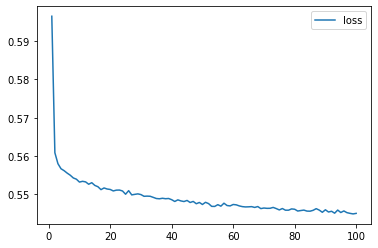

In [121]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

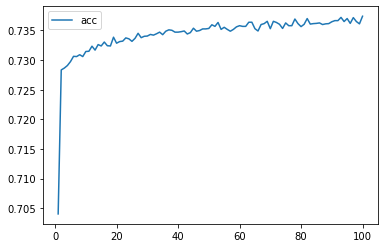

In [122]:

history_df.plot(y="acc")

Let's try PCA to reduce the feature space and imporve our NN

In [78]:
from sklearn.decomposition import PCA
X_scaled = scaler.transform(X)
print("X.shape before PCA", X.shape)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
print("X.shape after PCA: ",X_pca.shape)

X.shape before PCA (34299, 28)
X.shape after PCA:  (34299, 10)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, random_state=78)

In [89]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer3 = 8
hidden_nodes_layer4 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 5         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [92]:
fit_model = nn.fit(X_train, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 91us/sample - loss: 0.6097 - acc: 0.6902
Epoch 2/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5837 - acc: 0.7132
Epoch 3/100
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5743 - acc: 0.7182
Epoch 4/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5688 - acc: 0.7219
Epoch 5/100
25724/25724 [==============================] - 2s 82us/sample - loss: 0.5654 - acc: 0.7234
Epoch 6/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5643 - acc: 0.7252
Epoch 7/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5628 - acc: 0.7269
Epoch 8/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5622 - acc: 0.7272
Epoch 9/100
25724/25724 [==============================] - 2s 90us/sample - loss: 0.5616 - acc: 0.7269
Epoch 10/100
25724/25724 [==============================] - 2s 96us/sampl

25724/25724 [==============================] - 2s 74us/sample - loss: 0.5534 - acc: 0.7312
Epoch 80/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5533 - acc: 0.7306
Epoch 81/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5534 - acc: 0.7306
Epoch 82/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5530 - acc: 0.7305
Epoch 83/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5534 - acc: 0.7307
Epoch 84/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5529 - acc: 0.7310
Epoch 85/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5532 - acc: 0.7314
Epoch 86/100
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5528 - acc: 0.7310
Epoch 87/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5531 - acc: 0.7304
Epoch 88/100
25724/25724 [==============================] - 2s 63us/sample - 

ValueError: Error when checking input: expected dense_33_input to have shape (10,) but got array with shape (28,)

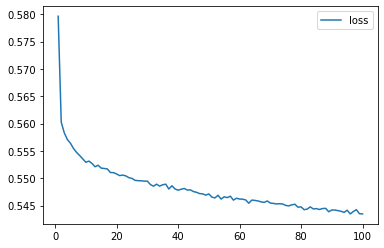

In [101]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

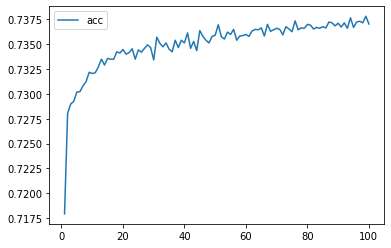

In [102]:

history_df.plot(y="acc")